In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report

## Data optimization

In [70]:
min_max = MinMaxScaler()
stand = StandardScaler()
robu = RobustScaler()

In [71]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [72]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 281.4 KB


<Axes: >

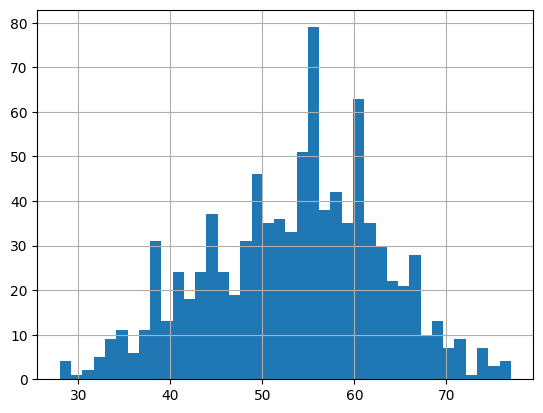

In [73]:
data['Age'].hist(bins=40)

In [74]:
data['Age'] = (stand.fit_transform(data[['Age']])).astype('float16')

In [75]:
data['Sex'] = (data['Sex'] == 'M').astype('int8')

In [76]:
data = pd.get_dummies(data, columns=['ChestPainType'], dtype='int8')

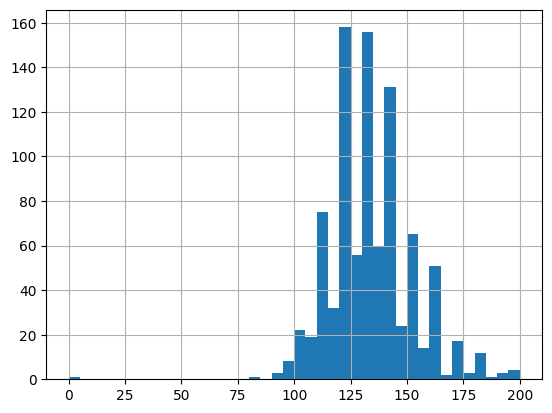

In [77]:
data['RestingBP'].hist(bins=40);

In [78]:
data['RestingBP'] = (stand.fit_transform(data[['RestingBP']])).astype('float16')

<Axes: >

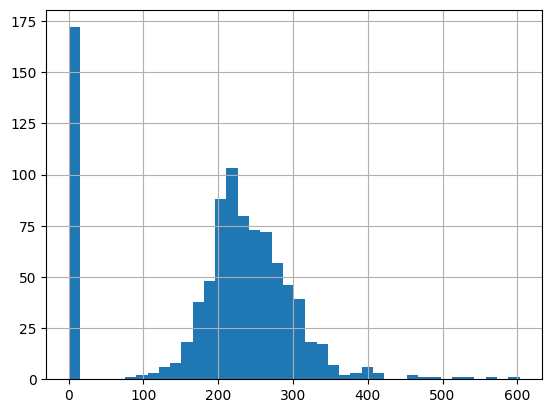

In [79]:
data['Cholesterol'].hist(bins=40)

In [80]:
data['Cholesterol'] = min_max.fit_transform(data[['Cholesterol']]).astype('float16')

In [81]:
data['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [82]:
data = pd.get_dummies(data, columns=['RestingECG'], dtype='int8')

<Axes: >

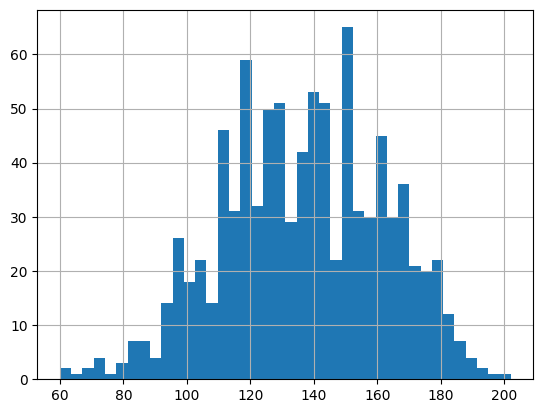

In [83]:
data['MaxHR'].hist(bins=40)

In [84]:
data['MaxHR'] = (stand.fit_transform(data[['MaxHR']])).astype('float16')

In [85]:
data['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [86]:
data['ExerciseAngina'] = (data['ExerciseAngina'] == 'Y').astype('int8')

<Axes: >

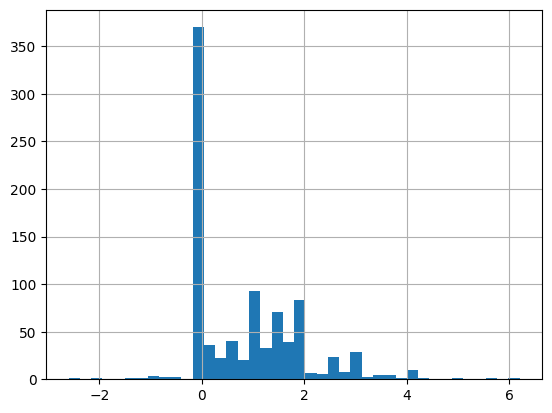

In [87]:
data['Oldpeak'].hist(bins=40)

In [88]:
data['Oldpeak'] = (robu.fit_transform(data[['Oldpeak']])).astype('float16')

In [89]:
data['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [90]:
data = pd.get_dummies(data, columns=['ST_Slope'], dtype='int8')

In [91]:
data['HeartDisease'] = data['HeartDisease'].astype('int8')
data['FastingBS'] = data['FastingBS'].astype('int8')

In [92]:
data

C:\Users\lenov\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433594,1,0.410889,0.479248,0,1.382812,0,-0.399902,0,0,1,0,0,0,1,0,0,0,1
1,-0.478516,0,1.492188,0.298584,0,0.754395,0,0.266602,1,0,0,1,0,0,1,0,0,1,0
2,-1.750977,1,-0.129517,0.469238,0,-1.525391,0,-0.399902,0,0,1,0,0,0,0,1,0,0,1
3,-0.584473,0,0.302734,0.354980,0,-1.131836,1,0.600098,1,1,0,0,0,0,1,0,0,1,0
4,0.051880,1,0.951172,0.323486,0,-0.582031,0,-0.399902,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902832,1,-1.209961,0.437744,0,-0.188965,0,0.399902,1,0,0,0,1,0,1,0,0,1,0
914,1.537109,1,0.626953,0.320068,1,0.164673,0,1.866211,1,1,0,0,0,0,1,0,0,1,0
915,0.370117,1,-0.129517,0.217285,0,-0.856934,1,0.399902,1,1,0,0,0,0,1,0,0,1,0
916,0.370117,0,-0.129517,0.391357,0,1.461914,0,-0.399902,1,0,1,0,0,1,0,0,0,1,0


In [93]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    float16
 1   Sex                918 non-null    int8   
 2   RestingBP          918 non-null    float16
 3   Cholesterol        918 non-null    float16
 4   FastingBS          918 non-null    int8   
 5   MaxHR              918 non-null    float16
 6   ExerciseAngina     918 non-null    int8   
 7   Oldpeak            918 non-null    float16
 8   HeartDisease       918 non-null    int8   
 9   ChestPainType_ASY  918 non-null    int8   
 10  ChestPainType_ATA  918 non-null    int8   
 11  ChestPainType_NAP  918 non-null    int8   
 12  ChestPainType_TA   918 non-null    int8   
 13  RestingECG_LVH     918 non-null    int8   
 14  RestingECG_Normal  918 non-null    int8   
 15  RestingECG_ST      918 non-null    int8   
 16  ST_Slope_Down      918 non

## Model Learning

In [221]:
data

C:\Users\lenov\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433594,1,0.410889,0.479248,0,1.382812,0,-0.399902,0,0,1,0,0,0,1,0,0,0,1
1,-0.478516,0,1.492188,0.298584,0,0.754395,0,0.266602,1,0,0,1,0,0,1,0,0,1,0
2,-1.750977,1,-0.129517,0.469238,0,-1.525391,0,-0.399902,0,0,1,0,0,0,0,1,0,0,1
3,-0.584473,0,0.302734,0.354980,0,-1.131836,1,0.600098,1,1,0,0,0,0,1,0,0,1,0
4,0.051880,1,0.951172,0.323486,0,-0.582031,0,-0.399902,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902832,1,-1.209961,0.437744,0,-0.188965,0,0.399902,1,0,0,0,1,0,1,0,0,1,0
914,1.537109,1,0.626953,0.320068,1,0.164673,0,1.866211,1,1,0,0,0,0,1,0,0,1,0
915,0.370117,1,-0.129517,0.217285,0,-0.856934,1,0.399902,1,1,0,0,0,0,1,0,0,1,0
916,0.370117,0,-0.129517,0.391357,0,1.461914,0,-0.399902,1,0,1,0,0,1,0,0,0,1,0


In [222]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

### Data selection

In [223]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (734, 18)
y_train shape: (734,)
X_test shape: (184, 18)
y_test shape: (184,)


### LogisticRegression

In [224]:
model_Log = LogisticRegression(max_iter=1000)
model_Log.fit(X_train, y_train)
y_pred_Log = model_Log.predict(X_test)

In [225]:
y_pred_Log, np.array(y_test)

(array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 0, 1], dtype=int8),
 array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1

In [226]:
accs_Log = cross_val_score(model_Log, X, y, cv=kf, scoring='accuracy')

In [227]:
accs_Log.mean()

np.float64(0.8616060822047992)

In [228]:
print(classification_report(y_test, y_pred_Log))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        77
           1       0.91      0.86      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



### KNeighborsClassifier

In [229]:
scores = []
neighbors = range(1, 31)  # проверяем от 1 до 30 соседей
for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    cv_score = cross_val_score(model, X, y, cv=5, scoring='f1').mean()
    scores.append(cv_score)

neighbors[np.argmax(scores)]

29

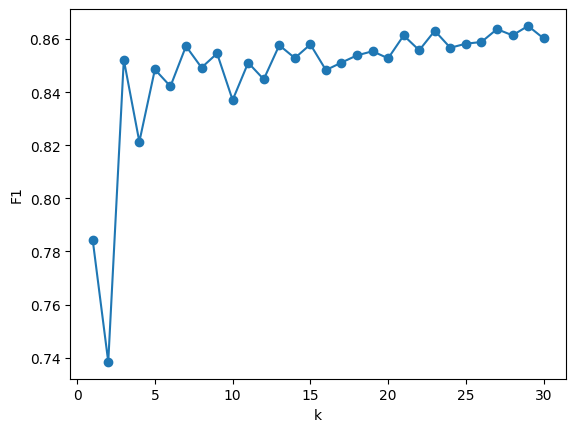

In [230]:
plt.plot(range(1, 31), scores, marker='o')
plt.xlabel('k')
plt.ylabel('F1')
plt.show()

In [231]:
model_KNN = KNeighborsClassifier(n_neighbors=29)
model_KNN.fit(X_train, y_train)
y_pred_KNN = model_KNN.predict(X_test)

In [232]:
y_pred_KNN, np.array(y_test)

(array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 1, 1, 0, 1], dtype=int8),
 array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1

In [236]:
accs_KNN = cross_val_score(model_KNN, X, y, cv=kf, scoring='f1')
accs_KNN.mean()

np.float64(0.8796001544501306)

In [235]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



### GaussianNB

In [240]:
model_Gauss = GaussianNB()
model_Gauss.fit(X_train, y_train)
y_pred_Gauss = model_Gauss.predict(X_test)
accs_Gauss= cross_val_score(model_Gauss, X, y, cv=5, scoring='f1')

In [245]:
print('accs_Gauss:', accs_Gauss.mean())
print(classification_report(y_test, y_pred_KNN))

y_pred_KNN, np.array(y_test)

accs_Gauss: 0.848225531302998
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



(array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 1, 1, 0, 1], dtype=int8),
 array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1